In [1]:
# Importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFECV,RFE
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
data = pd.read_csv(r'../input/h1n1-vaccination/h1n1_vaccine_prediction.csv')
data

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [4]:
pd.set_option('display.max_columns',100)
data.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [5]:
# Now lets look out for missing values

In [6]:
data.isna().sum().sort_values(ascending=False)

has_health_insur             12274
income_level                  4423
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
housing_status                2042
employment                    1463
marital_status                1408
qualification                 1407
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
sick_from_seas_vacc            537
is_seas_risky                  514
is_seas_vacc_effective         462
sick_from_h1n1_vacc            395
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
no_of_children                 249
no_of_adults                   249
contact_avoidance              208
avoid_touch_face               128
h1n1_awareness                 116
h1n1_worry                      92
avoid_large_gatherings          87
reduced_outside_home_cont       82
antiviral_medication            71
wash_hands_frequently           42
bought_face_mask                19
census_msa          

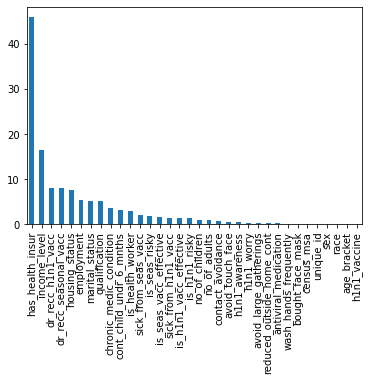

In [7]:
# Missing Percentage
miss_percent=((data.isna().sum()/len(data))*100).sort_values(ascending=False)
miss_percent.plot.bar()
plt.show()

In [8]:
# droping columns which has missing percentage greater than 10 percent
miss_cols=list(miss_percent[miss_percent>10].index)
data1=data.drop(data[miss_cols],axis=1)

In [9]:
data1.isna().sum().sort_values(ascending=False)

dr_recc_h1n1_vacc            2160
dr_recc_seasonal_vacc        2160
housing_status               2042
employment                   1463
marital_status               1408
qualification                1407
chronic_medic_condition       971
cont_child_undr_6_mnths       820
is_health_worker              804
sick_from_seas_vacc           537
is_seas_risky                 514
is_seas_vacc_effective        462
sick_from_h1n1_vacc           395
is_h1n1_vacc_effective        391
is_h1n1_risky                 388
no_of_children                249
no_of_adults                  249
contact_avoidance             208
avoid_touch_face              128
h1n1_awareness                116
h1n1_worry                     92
avoid_large_gatherings         87
reduced_outside_home_cont      82
antiviral_medication           71
wash_hands_frequently          42
bought_face_mask               19
census_msa                      0
unique_id                       0
sex                             0
race          

In [10]:
# Hence we can see that large proportion of the column have value zero in valuecounts
# we are imputing the null value with the mode of the column have lesser that 1000 null values
miss_row = data1.isna().sum().sort_values(ascending=False)
miss_row = miss_row[(miss_row<1000) & (miss_row!=0)].index
miss_row

Index(['chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'sick_from_seas_vacc', 'is_seas_risky',
       'is_seas_vacc_effective', 'sick_from_h1n1_vacc',
       'is_h1n1_vacc_effective', 'is_h1n1_risky', 'no_of_children',
       'no_of_adults', 'contact_avoidance', 'avoid_touch_face',
       'h1n1_awareness', 'h1n1_worry', 'avoid_large_gatherings',
       'reduced_outside_home_cont', 'antiviral_medication',
       'wash_hands_frequently', 'bought_face_mask'],
      dtype='object')

In [11]:
data2= data1.copy()
data2[miss_row] = data2[miss_row].apply(lambda x: x.fillna(x.mode()[0]))

In [12]:
# droping rest of the na values
data3 = data2.dropna()

In [13]:
# changing some of categorical values into numbers to analyse it
clean = {'age_bracket':{'18 - 34 Years':1,'35 - 44 Years':2,'45 - 54 Years':3,'55 - 64 Years':4,'65+ Years':5},
        'qualification':{'< 12 Years':1,'12 Years':2,'College Graduate':3,'Some College':4}}
data3=data3.replace(clean)

In [14]:
# Lets analyse all feature with corresponding with the target variable by creating a function
def analysis(df,graph_per_row,max_graphs):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col]>1 and nunique[col]<50]]
    nrow, ncol = df.shape
    colname = list(df)
    graph_row = (ncol+graph_per_row-1)/graph_per_row
    plt.figure(figsize=(12*graph_per_row,8*graph_row))
    for i in range(min(ncol,max_graphs)):
        plt.subplot(graph_row,graph_per_row,i+1)
        coltype = df.iloc[:,i]
        if (not np.issubdtype(type(coltype.iloc[0]),np.str)):
            sns.countplot(colname[i], hue='h1n1_vaccine',data=df)
        else:
            coltype.hist()
        plt.title(f'{colname[i]}')
        plt.xticks(rotation=60)
    plt.show()

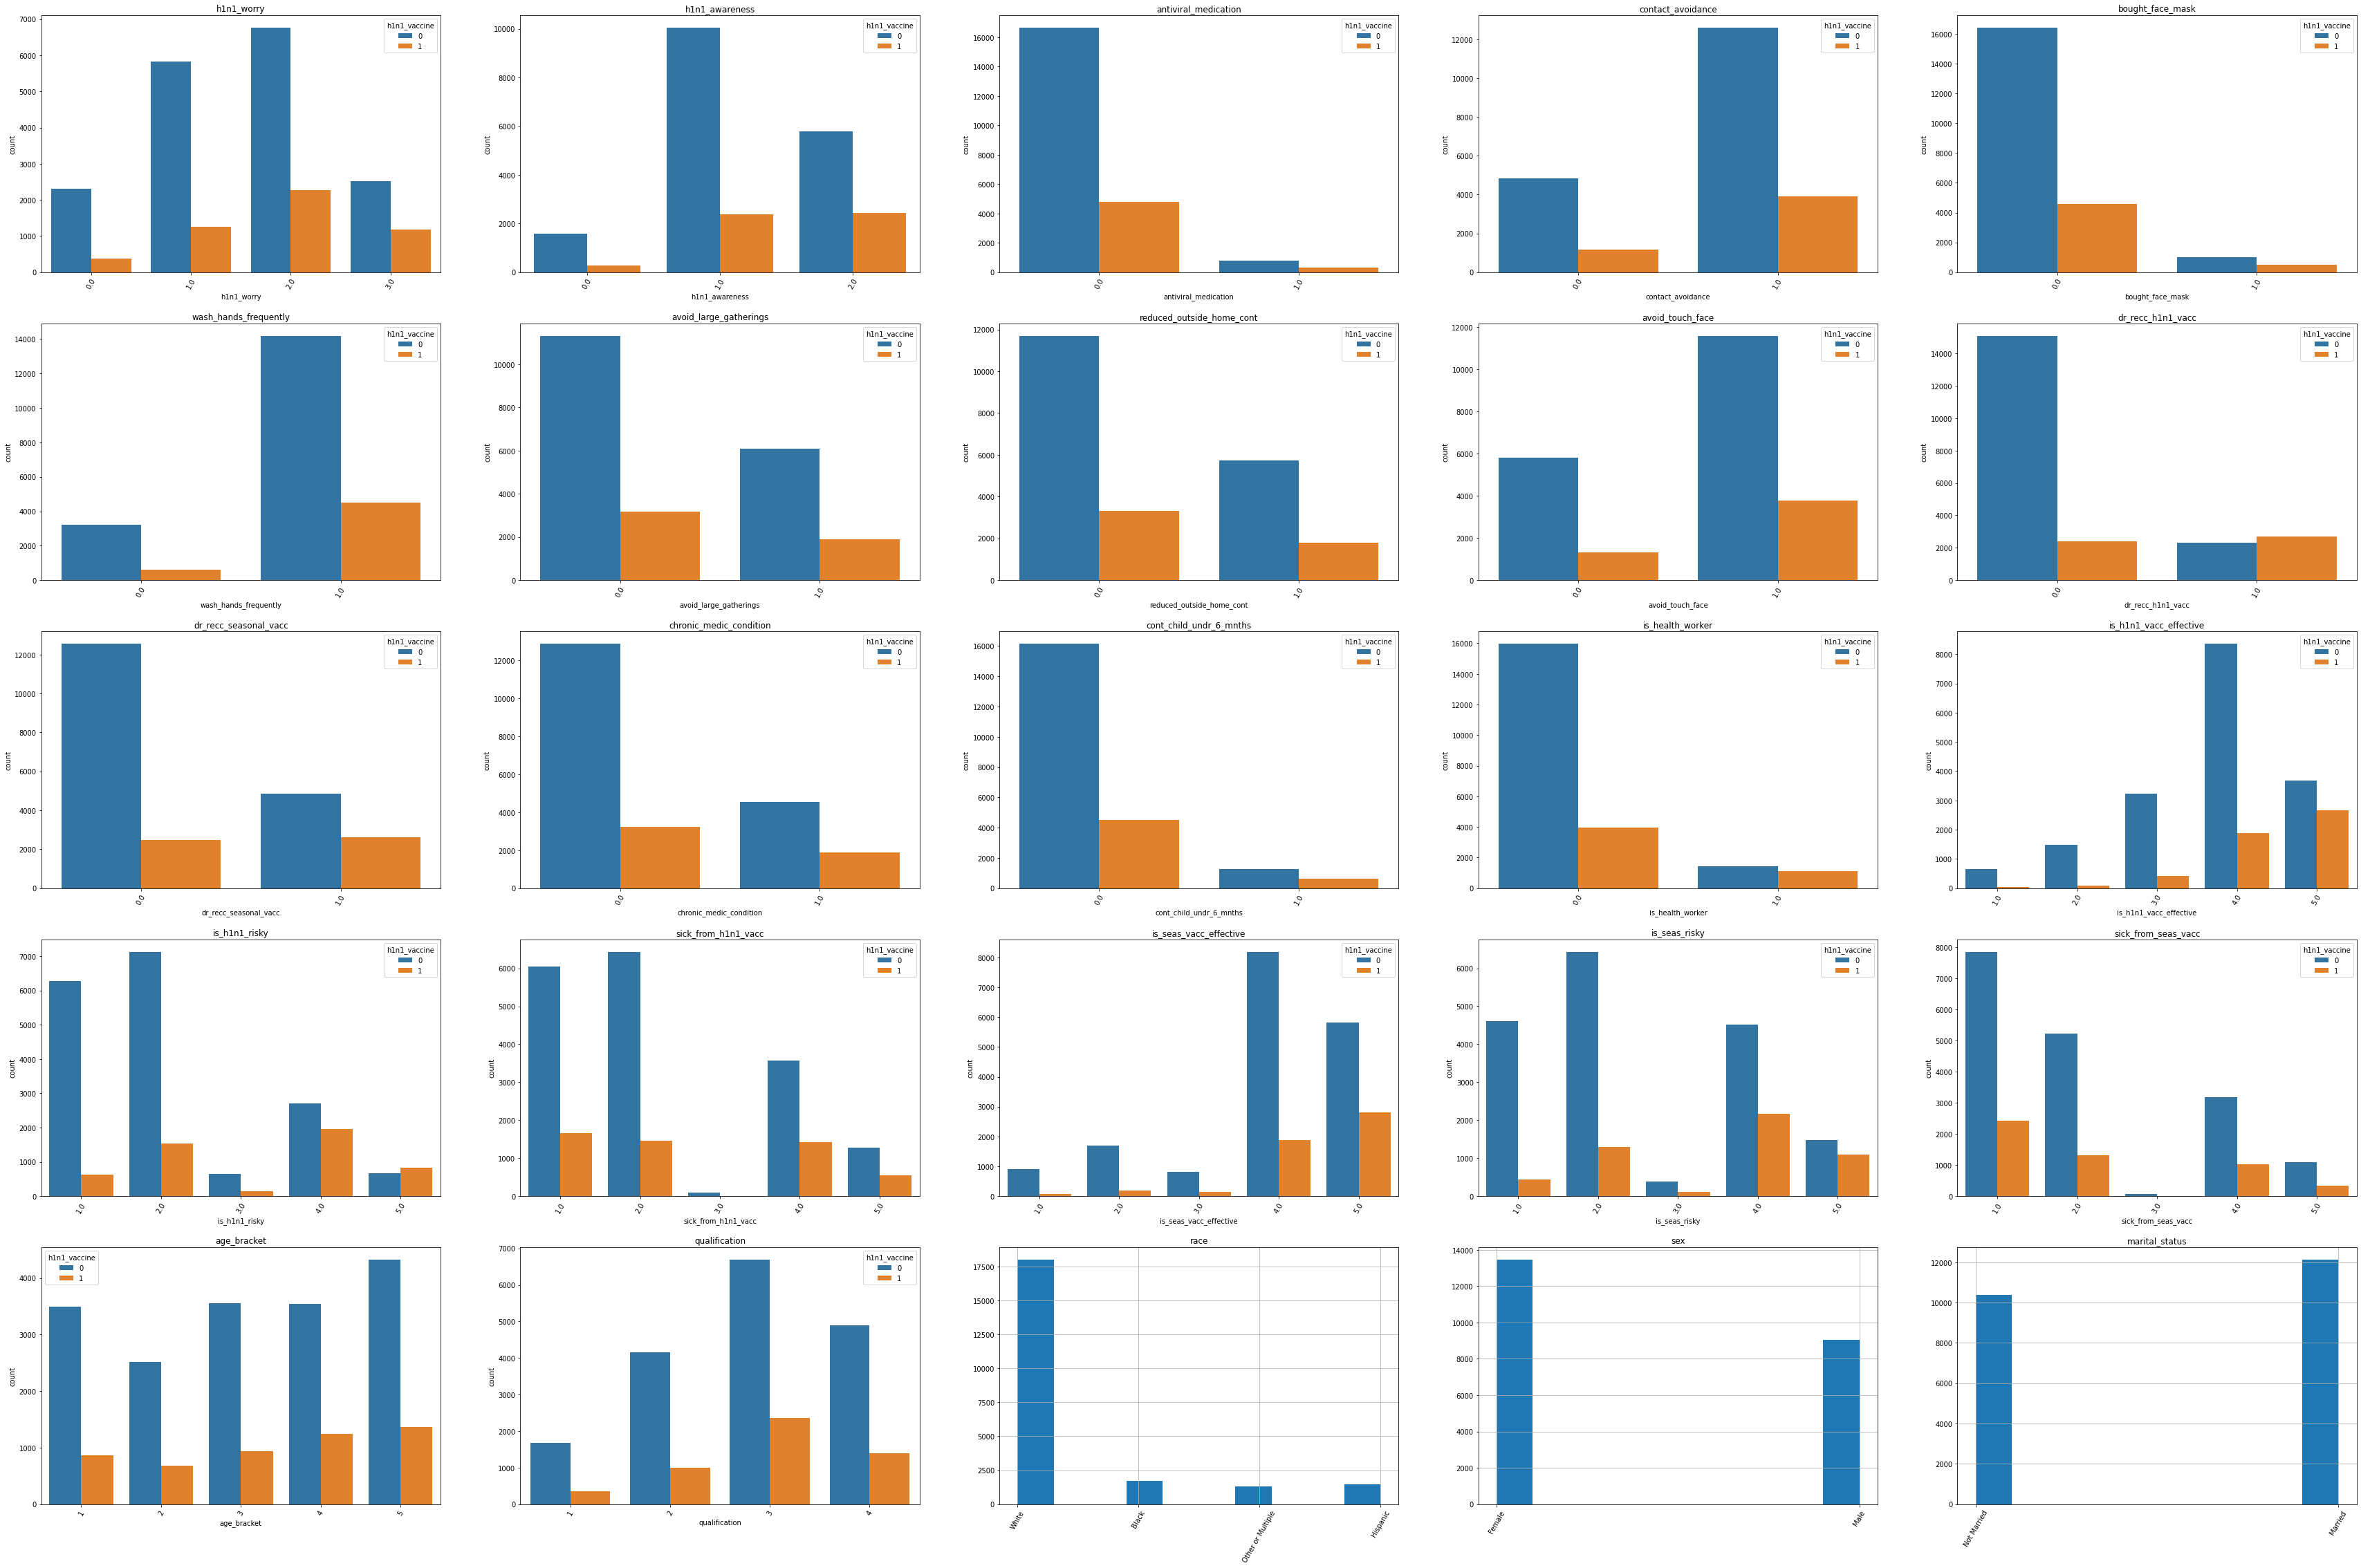

In [15]:
analysis(data3,5,25)

In [16]:
data3.isna().sum().sort_values(ascending=False)

unique_id                    0
h1n1_worry                   0
no_of_children               0
no_of_adults                 0
census_msa                   0
employment                   0
housing_status               0
marital_status               0
sex                          0
race                         0
qualification                0
age_bracket                  0
sick_from_seas_vacc          0
is_seas_risky                0
is_seas_vacc_effective       0
sick_from_h1n1_vacc          0
is_h1n1_risky                0
is_h1n1_vacc_effective       0
is_health_worker             0
cont_child_undr_6_mnths      0
chronic_medic_condition      0
dr_recc_seasonal_vacc        0
dr_recc_h1n1_vacc            0
avoid_touch_face             0
reduced_outside_home_cont    0
avoid_large_gatherings       0
wash_hands_frequently        0
bought_face_mask             0
contact_avoidance            0
antiviral_medication         0
h1n1_awareness               0
h1n1_vaccine                 0
dtype: i

In [17]:
# Check for Multicollinearity
obj = data3.select_dtypes(include='object').columns
[print(i,'-->',data3[i].unique()) for i in obj]

race --> ['White' 'Black' 'Other or Multiple' 'Hispanic']
sex --> ['Female' 'Male']
marital_status --> ['Not Married' 'Married']
housing_status --> ['Own' 'Rent']
employment --> ['Not in Labor Force' 'Employed' 'Unemployed']
census_msa --> ['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']


[None, None, None, None, None, None]

In [18]:
clean = {'sex':{'Female':0 ,'Male':1},
        'employment':{'Not in Labor Force':1,'Employed':2,'Unemployed':3},
        'census_msa':{'Non-MSA':1,'MSA, Not Principle  City':2,'MSA, Principle City':3},
         'housing_status':{'Own':1,'Rent':0},
        'marital_status':{'Not Married':0, 'Married':1}
}
data4=data3.replace(clean)

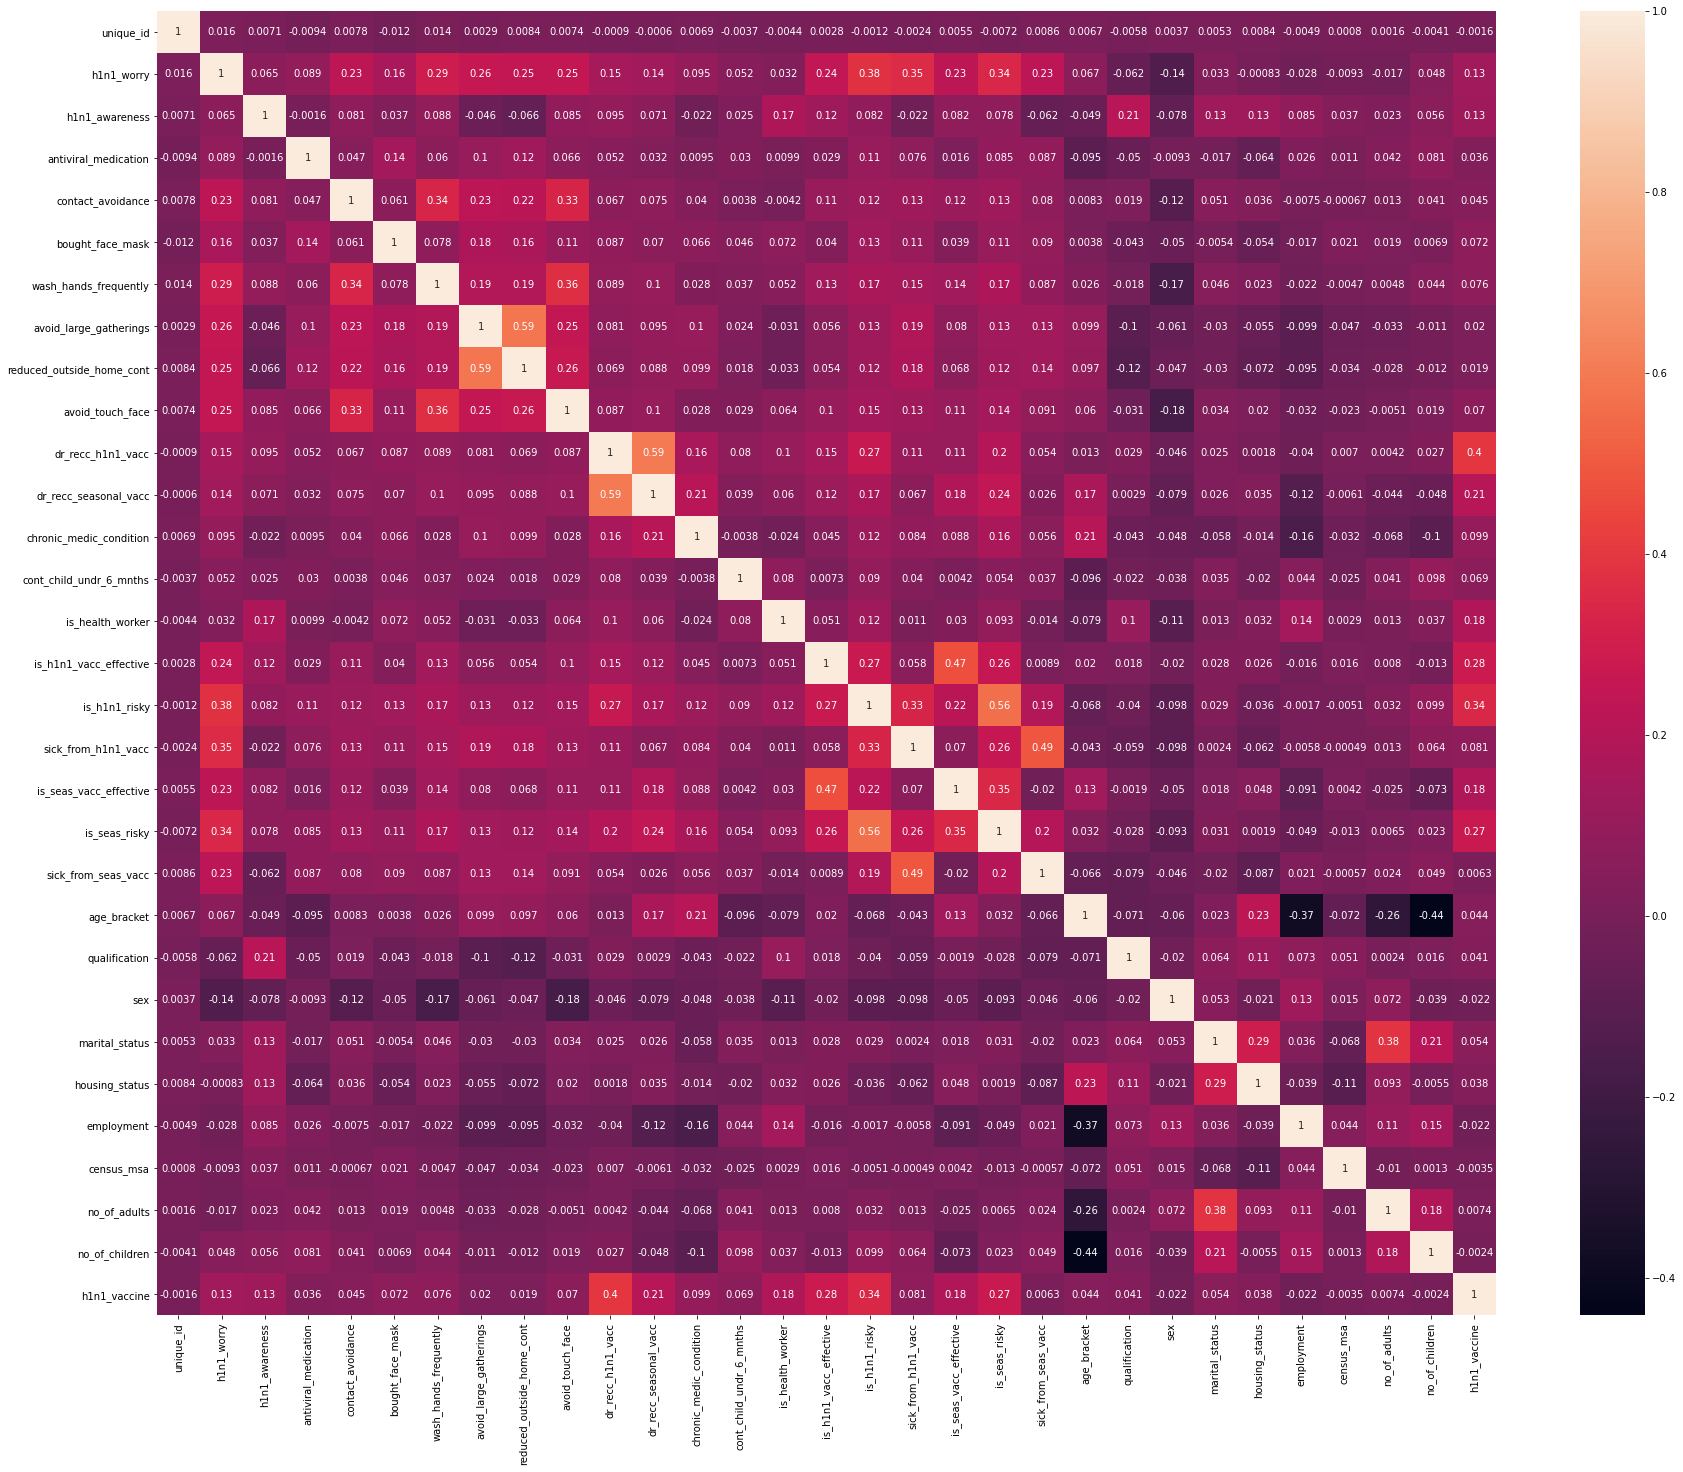

In [19]:
plt.figure(figsize=(30,24))
corr = data4.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [20]:
# we can more multicollinearity from the heat map 
# so we can check using Variance Influencing Factor
def vif_scores(df):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = df.columns
    VIF_Scores["VIF Scores"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return VIF_Scores

In [21]:
df1=data4.drop(data4[['unique_id','race','is_h1n1_vacc_effective','is_seas_vacc_effective','qualification']],axis=1)#'sex','marital_status','is_h1n1_vacc_effective','is_seas_vacc_effective'
df2 = df1.iloc[:,:-1]
vif_scores(df2)

,Independent Features,VIF Scores
0,h1n1_worry,6.046007
1,h1n1_awareness,5.769941
2,antiviral_medication,1.109319
3,contact_avoidance,4.639372
4,bought_face_mask,1.161282
5,wash_hands_frequently,7.403464
6,avoid_large_gatherings,2.494193
7,reduced_outside_home_cont,2.417682
8,avoid_touch_face,4.119389
9,dr_recc_h1n1_vacc,2.124976


In [22]:
# So, Except 'race','is_h1n1_vacc_effective','is_seas_vacc_effective','qualification' no other columns have Multicolinearity

In [23]:
# One Hot Encoding Race
one_hot = data4[['race']]
one_hot= pd.get_dummies(one_hot)
one_hot.columns

Index(['race_Black', 'race_Hispanic', 'race_Other or Multiple', 'race_White'], dtype='object')

In [24]:
data5= data4.drop(data4[['unique_id','race']],axis=1)

In [25]:
data5 = pd.concat([data5,one_hot],axis = 1)

In [26]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22504 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 22504 non-null  float64
 1   h1n1_awareness             22504 non-null  float64
 2   antiviral_medication       22504 non-null  float64
 3   contact_avoidance          22504 non-null  float64
 4   bought_face_mask           22504 non-null  float64
 5   wash_hands_frequently      22504 non-null  float64
 6   avoid_large_gatherings     22504 non-null  float64
 7   reduced_outside_home_cont  22504 non-null  float64
 8   avoid_touch_face           22504 non-null  float64
 9   dr_recc_h1n1_vacc          22504 non-null  float64
 10  dr_recc_seasonal_vacc      22504 non-null  float64
 11  chronic_medic_condition    22504 non-null  float64
 12  cont_child_undr_6_mnths    22504 non-null  float64
 13  is_health_worker           22504 non-null  flo

# Creating Models

In [27]:
# firt Creating model with all the features
x = data5.drop(['h1n1_vaccine'],axis=1)
y= data5['h1n1_vaccine']
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state=1)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred= model.predict(x_test)

In [28]:
# Creating Function for viewing Result of the predicted
def res(y_valid):
    cm1 = confusion_matrix(y_test,y_valid)
    ConfusionMatrixDisplay(cm1).plot().ax_.set(ylabel = 'Actual value', xlabel ='Predicted value')
    print('Accuracy',accuracy_score(y_test,y_valid))
    print(classification_report(y_test,y_valid))
    plt.show()

Accuracy 0.8280382137302822
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      3477
           1       0.68      0.46      0.55      1024

    accuracy                           0.83      4501
   macro avg       0.77      0.70      0.72      4501
weighted avg       0.82      0.83      0.81      4501



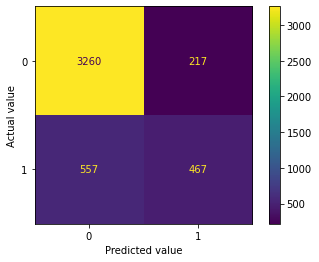

In [29]:
res(y_pred)

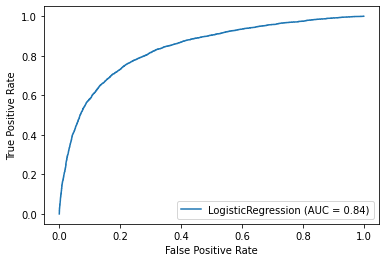

In [30]:
plot_roc_curve(model,x_train,y_train,response_method='predict_proba')

In [31]:
y_prob = model.predict_proba(x_test)
y_prob = y_prob[:,1]

Accuracy 0.7600533214841146
              precision    recall  f1-score   support

           0       0.91      0.76      0.83      3477
           1       0.48      0.75      0.59      1024

    accuracy                           0.76      4501
   macro avg       0.70      0.76      0.71      4501
weighted avg       0.82      0.76      0.78      4501



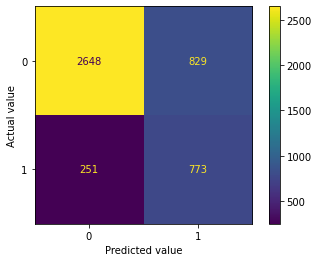

In [32]:
#predict using custom thershold
Thersold = 0.2
y_pred1 =  np.where(y_prob>Thersold,1,0)
res(y_pred1)

In [33]:
# We can use Thershold based on our recuriment of the model

Accuracy 0.7425016662963786
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      3477
           1       0.44      0.47      0.45      1024

    accuracy                           0.74      4501
   macro avg       0.64      0.65      0.64      4501
weighted avg       0.75      0.74      0.75      4501



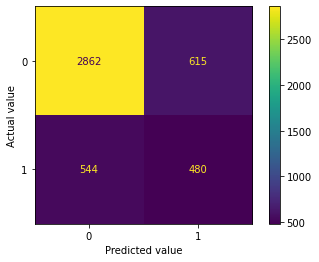

In [34]:
# DecisionTree Model
dec = DecisionTreeClassifier()
dec.fit(x_train,y_train)
y_pred_dec = dec.predict(x_test)
res(y_pred_dec)

Accuracy 0.8280382137302822
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      3477
           1       0.68      0.46      0.55      1024

    accuracy                           0.83      4501
   macro avg       0.77      0.70      0.72      4501
weighted avg       0.82      0.83      0.81      4501



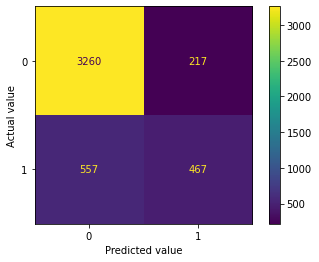

In [35]:
# Random Forest Model
rand = RandomForestClassifier()
rand.fit(x_train,y_train)
y_pred_rand = rand.predict(x_test)
res(y_pred)

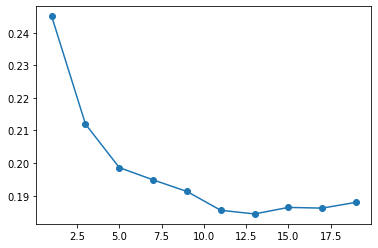

In [36]:
# KNN Model
error = []
for i in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred_knn = knn.predict(x_test)
    error.append(np.mean(y_test!=y_pred_knn))
plt.plot(range(1,20,2), error, marker='o')

Accuracy 0.8013774716729616
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3477
           1       0.59      0.40      0.48      1024

    accuracy                           0.80      4501
   macro avg       0.72      0.66      0.68      4501
weighted avg       0.78      0.80      0.79      4501



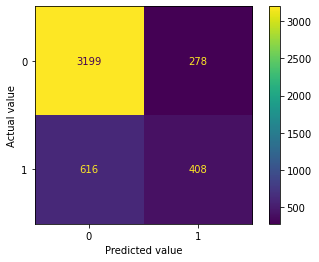

In [37]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
res(y_pred_knn)

In [38]:
# Getting best Features out of all of them Using
#Recursive Feature Engineering
rfe = RFE(rand)
rfe.fit(x_train,y_train)

RFE(estimator=RandomForestClassifier())

In [39]:
select = []
features = rfe.support_
cols = x.columns
for i,j in enumerate(features):
    if j==True:
        select.append(cols[i])
select

['h1n1_worry',
 'h1n1_awareness',
 'dr_recc_h1n1_vacc',
 'is_h1n1_vacc_effective',
 'is_h1n1_risky',
 'sick_from_h1n1_vacc',
 'is_seas_vacc_effective',
 'is_seas_risky',
 'sick_from_seas_vacc',
 'age_bracket',
 'qualification',
 'sex',
 'employment',
 'census_msa',
 'no_of_adults',
 'no_of_children']

Accuracy 0.821373028215952
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      3477
           1       0.67      0.43      0.52      1024

    accuracy                           0.82      4501
   macro avg       0.76      0.68      0.71      4501
weighted avg       0.81      0.82      0.81      4501



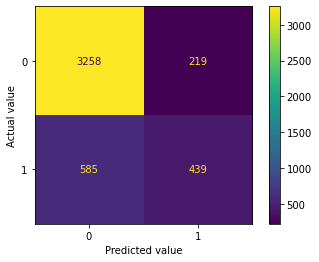

In [40]:
# Now from the best Features, Creating logistice Model 
x = data5[['h1n1_worry',
 'h1n1_awareness',
 'dr_recc_h1n1_vacc',
 'is_h1n1_vacc_effective',
 'is_h1n1_risky',
 'sick_from_h1n1_vacc',
 'is_seas_vacc_effective',
 'is_seas_risky',
 'sick_from_seas_vacc',
 'age_bracket',
 'qualification',
 'sex',
 'employment',
 'census_msa',
 'no_of_adults',
 'no_of_children']]
y= data5['h1n1_vaccine']
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state=1)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred_features= model.predict(x_test)
res(y_pred_features)

In [41]:
# We can see from the Results that 16 features give the same accuracy as 32 features

In [42]:
# Hyperparameter tunning
# first geting best parameter to use in Random Forest model and predict with it
parameters = {'n_estimators':[10,20,30,40,50],'max_depth':[3,4,5,6,7], 'criterion':('entropy', 'gini'),'max_leaf_nodes':[5,10,15,20]}
clf = GridSearchCV(rand, parameters)
clf.fit(x_train,y_train)
clf.best_params_

{'criterion': 'gini', 'max_depth': 6, 'max_leaf_nodes': 20, 'n_estimators': 30}

Accuracy 0.8202621639635637
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      3477
           1       0.68      0.39      0.50      1024

    accuracy                           0.82      4501
   macro avg       0.76      0.67      0.70      4501
weighted avg       0.80      0.82      0.80      4501



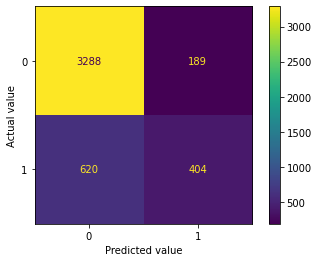

In [43]:
y_pred_GS = clf.predict(x_test)
res(y_pred_GS)

# Ensemble Models

In [44]:
# !pip install xgboost
# %pip install lightgbm
# %pip install catboost

[05:29:59] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy 0.8158187069540103
              precision    recall  f1-score   support

           0       0.85      0.92      0.89      3477
           1       0.63      0.46      0.53      1024

    accuracy                           0.82      4501
   macro avg       0.74      0.69      0.71      4501
weighted avg       0.80      0.82      0.80      4501



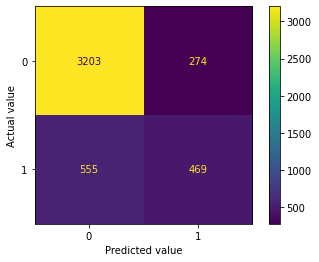

In [45]:
# XGB 
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train,y_train)
y_pred_xgb = xgb_model.predict(x_test)
res(y_pred_xgb)

Accuracy 0.8240391024216841
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      3477
           1       0.67      0.46      0.54      1024

    accuracy                           0.82      4501
   macro avg       0.76      0.69      0.72      4501
weighted avg       0.81      0.82      0.81      4501



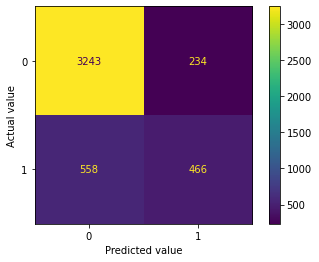

In [46]:
# Cat Boost
model_cat = CatBoostClassifier()
model_cat.fit(x_train,y_train,verbose=False)
y_pred_cat = model_cat.predict(x_test)
res(y_pred_cat)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005956 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 80
[LightGBM] [Info] Number of data points in the train set: 18003, number of used features: 16
[LightGBM] [Info] Start training from score 0.225629
Accuracy 0.821373028215952
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      3477
           1       0.67      0.43      0.52      1024

    accuracy                           0.82      4501
   macro avg       0.76      0.68      0.71      4501
weighted avg       0.81      0.82      0.81      4501



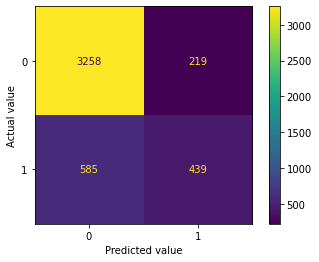

In [47]:
# LightGB
train_data = lgb.Dataset(x_train,y_train)
params = {'learning_rate':0.001}
model_lgb = lgb.train(params,train_data)
y_pred_lgb=model.predict(x_test)
res(y_pred_lgb)

In [48]:
# So from the above model we can conclude that the XGB give some good recall and precision when compared to all
# More over we cannot depend on accuracy on Classification Problem 
# We can change the True Positive Rate or False Positive Rate depending on our problem statement